<a href="https://colab.research.google.com/github/sejeong-park/Data_Box/blob/main/2017_Kaggle_Machine_Learning_%26_Data_Science_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sejeongpark","key":"7a84aa4eff7ea2350c128dd0edbb04c6"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         29           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        144           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        805           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        158           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1951           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13932           False  
house-pr

In [10]:
! kaggle competitions download -c Data Science FAQ

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: FAQ


In [14]:
!unzip archive
zip

Archive:  archive.zip
  inflating: RespondentTypeREADME.txt  
  inflating: conversionRates.csv     
  inflating: freeformResponses.csv   
  inflating: multipleChoiceResponses.csv  
  inflating: schema.csv              


zip

In [15]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 데이터 파일의 이해 - 5개 파일
* schema.csv : 설문 스키마가 있는 csv 파일, 이 스키미에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문 포함

* multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답

* freeformResponses.csv : kaggle의 설문조사 질문에 대한 응답자의 주관식 답변. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음

* conversionRates.csv : R패키지 quantmod에서 2017년 9월 14일에 액세스 한 통화 변환율(USD)

* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩 하는 스키마

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
warnings.filterwarnings('ignore')


In [17]:
question = pd.read_csv('./schema.csv')
question.shape

question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [109]:
mcq = pd.read_csv('./multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [19]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [20]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


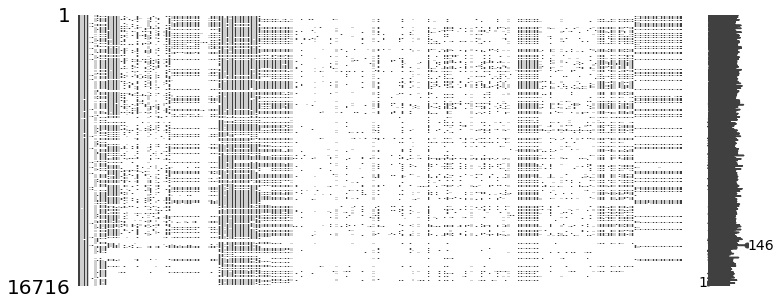

In [21]:
import missingno as msno

msno.matrix(mcq, figsize = (12,5))

16716명의 데이터와 선다형 객관식 문제와 62개의 주관식 질문에 대한 응답 -> (총 290개의 질문)

응답하지 않은 질문이 많음


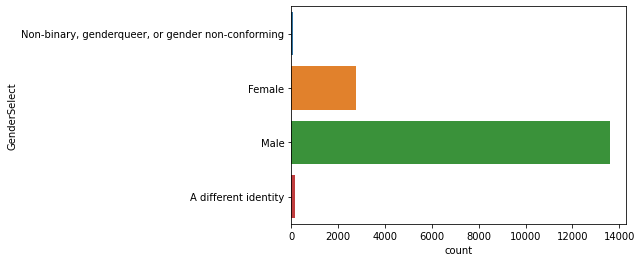

In [22]:
sns.countplot(y = 'GenderSelect', data=mcq)

In [23]:
mcq.groupby('GenderSelect').size()

GenderSelect
A different identity                                   159
Female                                                2778
Male                                                 13610
Non-binary, genderqueer, or gender non-conforming       74
dtype: int64

In [24]:
# 국가별 응답 수
con_df = pd.DataFrame(mcq['Country'].value_counts())
print(con_df)

                             Country
United States                   4197
India                           2704
Other                           1023
Russia                           578
United Kingdom                   535
People 's Republic of China      471
Brazil                           465
Germany                          460
France                           442
Canada                           440
Australia                        421
Spain                            320
Japan                            277
Taiwan                           254
Italy                            238
Netherlands                      205
Ukraine                          196
South Korea                      194
Poland                           184
Singapore                        184
Pakistan                         161
Turkey                           144
Indonesia                        131
Switzerland                      129
South Africa                     127
Mexico                           126
C

In [25]:
con_df['국가'] = con_df.index
con_df

,Country,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom
People 's Republic of China,471,People 's Republic of China
Brazil,465,Brazil
Germany,460,Germany
France,442,France
Canada,440,Canada


In [ ]:
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수','국가']
# index 컬럼을 삭제하고 순위를 알기 위해 reset_index()를 해준다.
# 우리나라는 18위이고, 전체 52개국에서 참여했지만 20위까지만 본다.
con_df = con_df.reset_index().drop('index', axis = 1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [ ]:
# 연령에 대한 정보를 본다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

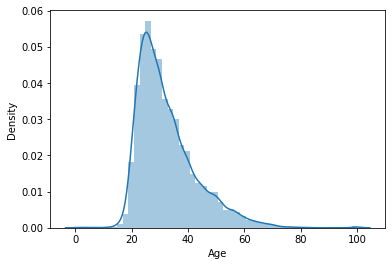

In [ ]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

응답자의 대부분이 어리며, 20대부터 급격히 늘어나며, 30대가 가장 많다. 평균 나이는 32세이다.

## 학력

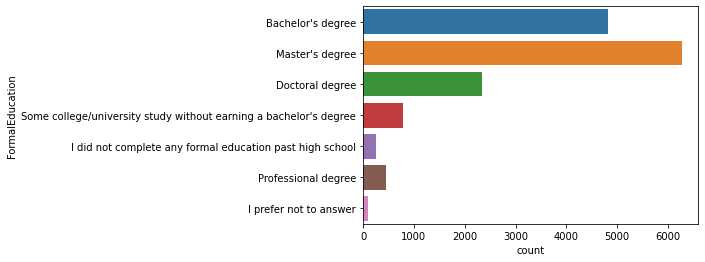

In [ ]:
sns.countplot(y = 'FormalEducation', data=mcq)

학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많으며, 박사 학위를 가지고 있는 사람들도 많다

In [ ]:
pd.DataFrame(mcq['MajorSelect'].value_counts())

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


## 전공

In [ ]:
# value_counts를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다.
# normalize = True 옵션을 사용하면, 해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는 지 알 수 있다.
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize = True))


In [ ]:
# index : major 과목 , mcq_major_count 와 mcq_major_percent 가 어느정도 비율을 차지하는지 알 수 잇음
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index = True, right_index = True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 전공자들이 33%로 가장 많으며, 다음으로 수학, 공학, 전기 공학 순이다.

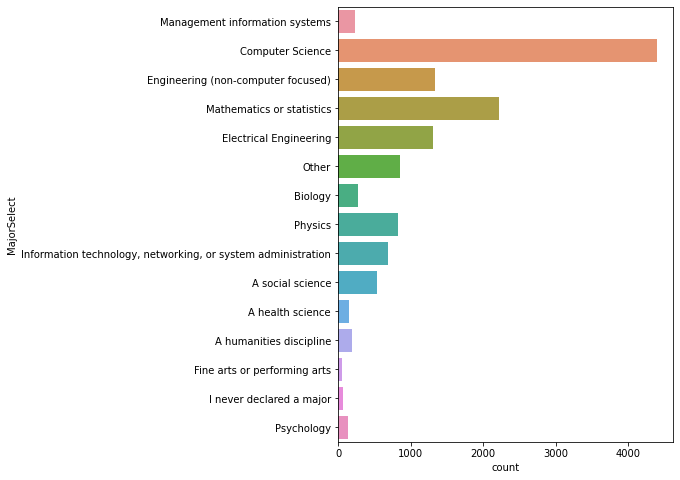

In [ ]:
# 재학 중인 사람들의 전공 현황
plt.figure(figsize = (6,8))
sns.countplot( y = 'MajorSelect', data = mcq)

## 취업 여부

In [ ]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize = True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index = True, right_index = True )
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


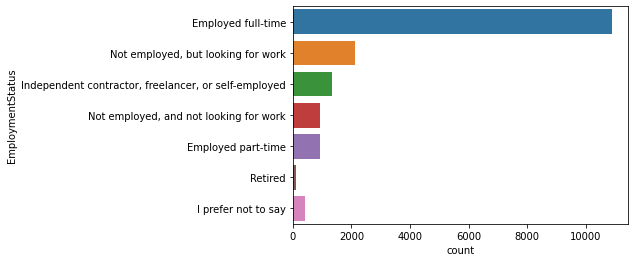

In [ ]:
sns.countplot( y ='EmploymentStatus' , data = mcq)


응답자의 대부분이 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12%이다.

## 프로그래밍 경험
* 'Tenure' 항목은 데이터 사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분 5년 미만이며, 특히 1~2년 경험을 가진 사람들이 많다.

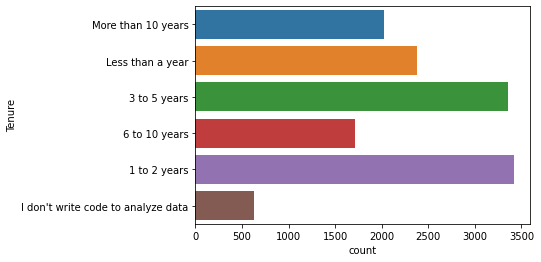

In [ ]:
sns.countplot( y = 'Tenure', data=mcq)

In [ ]:
korea = mcq.loc[(mcq['Country'] == 'South Korea')]

print('The number of interviewees in Korea : ' + str(korea.shape[0]))


The number of interviewees in Korea : 194


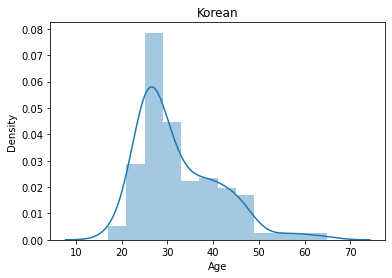

In [ ]:
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [ ]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

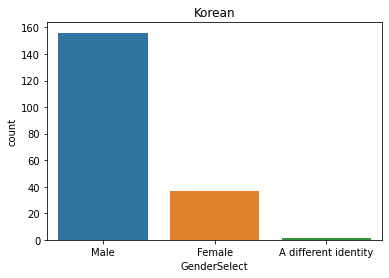

In [ ]:
sns.countplot( x = 'GenderSelect', data = korea)
plt.title('Korean')

Text(0.5, 1.0, 'Korea Male')

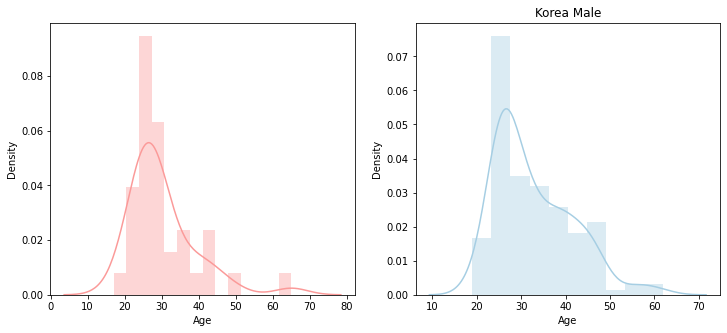

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols = 2)
figure.set_size_inches(12,5)

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(),
             norm_hist = False, color = sns.color_palette("Paired")[4], ax = ax1)
plt.title('Korea Femal')

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(),
             norm_hist = False, color = sns.color_palette("Paired")[0], ax = ax2)
plt.title("Korea Male")

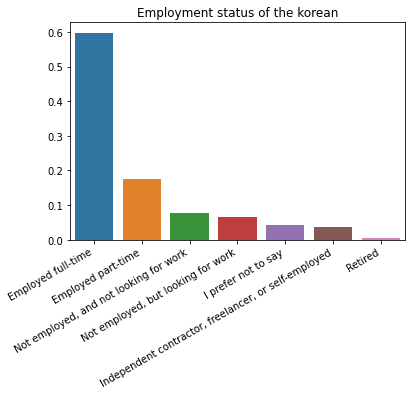

In [ ]:
sns.barplot( x = korea['EmploymentStatus'].unique(), y = korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation = 30, ha = 'right') 
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

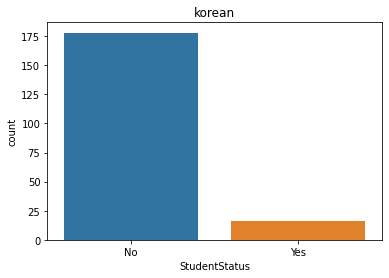

In [ ]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot( x = 'StudentStatus', data = korea )
plt.title('korean')
plt.show()

In [ ]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


In [ ]:
full_time

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Female,Indonesia,30.0,Employed full-time,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16708,Male,Indonesia,21.0,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16709,Male,People 's Republic of China,34.0,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
looking_for_job

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
18,Male,United States,26.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
19,Male,Brazil,39.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Not important,NaN,Somewhat important,Very Important,Somewhat important,Very Important,Somewhat important,Not important,Not important,Not important
35,Female,South Africa,23.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16669,Male,India,21.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16704,Male,Indonesia,26.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16705,Male,India,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16710,Male,People 's Republic of China,23.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Python과 R 중 어떤 언어를 배워야 할 까요?

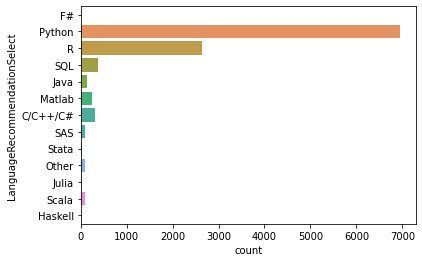

In [26]:
sns.countplot(y = 'LanguageRecommendationSelect', data = mcq)

파이썬을 명확하게 선호하고 있는 것으로 보여지며, 전문가와 강사들이 선호하는 언어를 알아본다

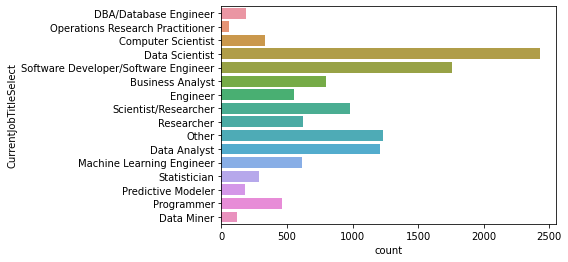

In [29]:
# 현재 하고 있는 일
sns.countplot(y = mcq['CurrentJobTitleSelect'])

In [34]:
# 현재 하고 있는 일에 대한 전체 응답 수
#mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


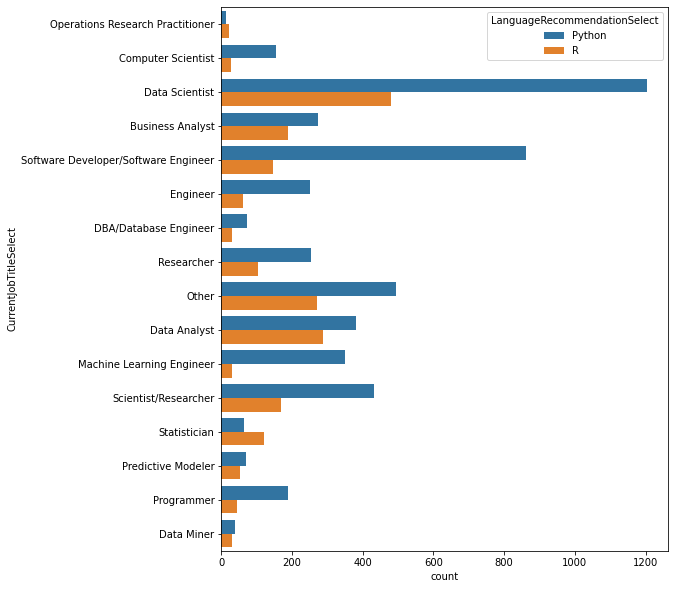

In [38]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 없무에서 어떤 언어를 주로 사용하는 지 보기 가능

data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) &(
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize = (8,10))
sns.countplot(y = 'CurrentJobTitleSelect',
              hue = 'LanguageRecommendationSelect',
              data = data)

데이터 사이언티스트들은 Python을 주로 사용하지만 R을 사용하는 사람들도 제법 된다. 

하지만 소프트웨어 개발자들은 Python을 훨씬 더 많이 사용하며, Python보다 R을 더 많이 사용하는 직업군은 통계학자들이다.

## 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은?

### 데이터사이언스 툴

In [39]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize = True))

In [43]:
mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index = True,  right_index = True).head(20)

In [44]:
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


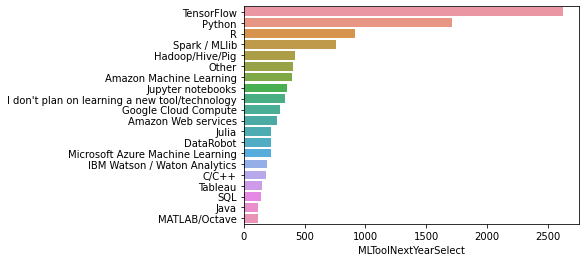

In [45]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y = data.index, x = data)

## 다음 해에 주목할 만한 Data Science Methods

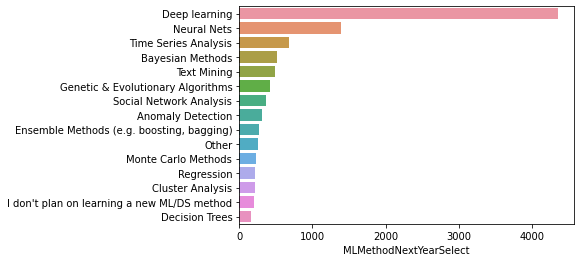

In [47]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y = data.index, x = data)

## 어디에서 데이터 사이언스를 배워야 할까요?

In [48]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x : x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'platform'

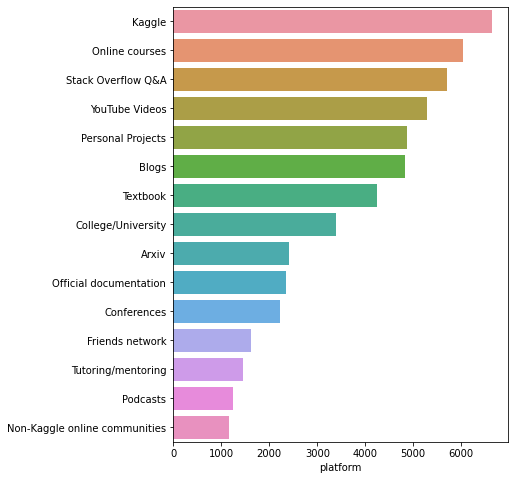

In [49]:
plt.figure(figsize = (6,8)) 
data = s[s!='nan'].value_counts().head(15)
sns.barplot(y=data.index, x = data)

* kaggle은 우리 응답자들 사이에서 가장 인기있는 학습 플랫폼
* 그러나 이 설문조사를 실시한 곳이 kaggle이기 때문에 응답이 편향될 가능성 존재
* 온라인 코스, 스택 오버플로 및 유튜브(Youtube) 상위 5대 최우수 학습 플랫폼은 대학 학위나 교서의 중요도보다 높다

In [51]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [52]:
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]

In [53]:
# 학습 플랫폼과 유용함에 대한 연관성을 살펴본다
fdf = {}
for feature in use_features:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending = False
)

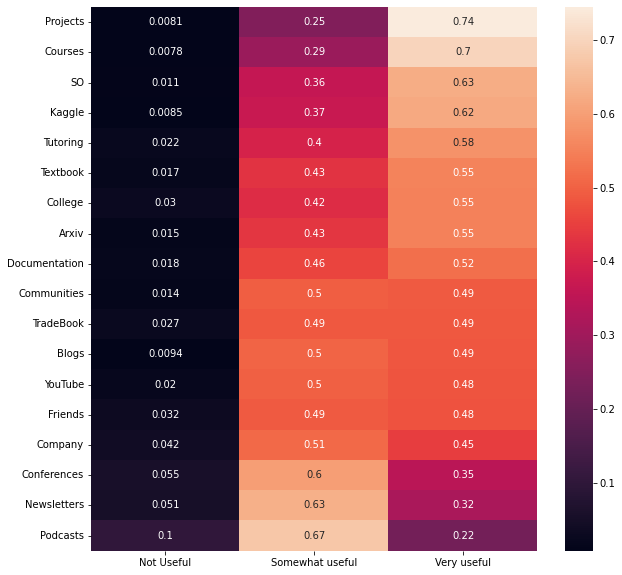

In [54]:
# 학습 플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다
plt.figure(figsize = (10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending = False
    ),
    annot = True
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

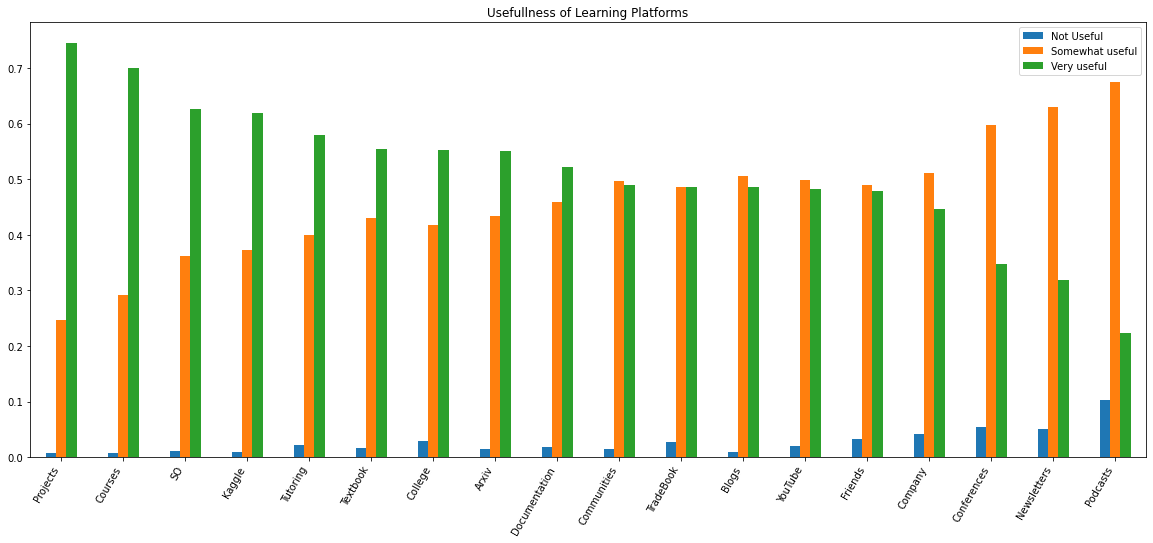

In [57]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다
fdf.plot(kind = 'bar', figsize = (20,8),
         title = 'Usefullness of Learning Platforms')
plt.xticks(rotation = 60, ha = 'right')

실제로 프로젝트를 해보는 것에 대해 74% 응답자가 매우 유용하다고 표시했다.
SO는 스택오버 플로우가 아닐까 싶고, 캐글, 수업, 책이 도움이 많이 되늰 편이다.

팟캐스트는 매우 유용하지 않지만 때때로 유용하다는 응답은 가장 많았다.

In [59]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory'
)!=-1]

cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [66]:
cdf = {}

for feature in cat_features : 
  # 새로운 딕셔너리 안에 key 값을 넣는데, 핵심 키값만 추출하기 위해
  # LearningCategorySelftTaught -> SelftTaught
  cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

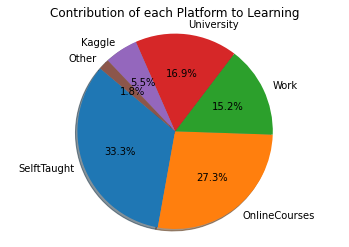

In [77]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels = cdf.index, autopct = '%1.1f%%',shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

개인 프로젝트를 해보는 것이 가장 많은 도움이 되었으며, 온라인 코스와 대학, 업무 그 다음을 캐글을 통해 배웠다고 응답했다.

## 데이터 과학을 위해 높은 사양의 컴퓨터가 필요한가?

                             Column  \
0                      GenderSelect   
1                    GenderFreeForm   
2                           Country   
3                               Age   
4                  EmploymentStatus   
..                              ...   
285                 JobFactorRemote   
286               JobFactorIndustry   
287       JobFactorLeaderReputation   
288              JobFactorDiversity   
289  JobFactorPublishingOpportunity   

                                              Question     Asked  
0       Select your gender identity. - Selected Choice       All  
1    Select your gender identity. - A different ide...       All  
2            Select the country you currently live in.       All  
3                                     What's your age?       All  
4               What's your current employment status?       All  
..                                                 ...       ...  
285  How are you assessing potential job opportunit...  Learne

In [106]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
#print(question['Column'])
#qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [107]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(16716,)

In [ ]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x : x.split(','))

In [113]:
s = mcq.apply(lambda x : pd.Series(x['HardwarePersonalProjectsSelect']),
              axis = 1).stack().reset_index(level = 1, drop = True)
print(mcq['HardwarePersonalProjectsSelect'])

s.name = 'hardware'

0                           [nan]
1                           [nan]
2        [Basic laptop (Macbook)]
3                           [nan]
4                           [nan]
                   ...           
16711                       [nan]
16712                       [nan]
16713                       [nan]
16714                       [nan]
16715                       [nan]
Name: HardwarePersonalProjectsSelect, Length: 16716, dtype: object


In [115]:
# s!= nan이니까 str이 존재하는 s 값만 추출
s = s[s!='nan']
print(s)

2                                   Basic laptop (Macbook)
7                                   Basic laptop (Macbook)
7                Gaming Laptop (Laptop + CUDA capable GPU)
10       Laptop or Workstation and local IT supported s...
12                                  Basic laptop (Macbook)
                               ...                        
16664                                                Azure
16664                                             GCE ...)
16664                              Traditional Workstation
16681            Gaming Laptop (Laptop + CUDA capable GPU)
16704    Laptop or Workstation and local IT supported s...
Name: hardware, Length: 6603, dtype: object


In [116]:
# r개수카운트
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북을 사용하는 응답자가 가장 많고, 랩탑과 함께 클라우드를 사용하는 사람들이 그 다음이고, 적당한 gpu를 가진 게임용 노트북을 사용하는 사례가 그 다음이다.

## 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지 ? 

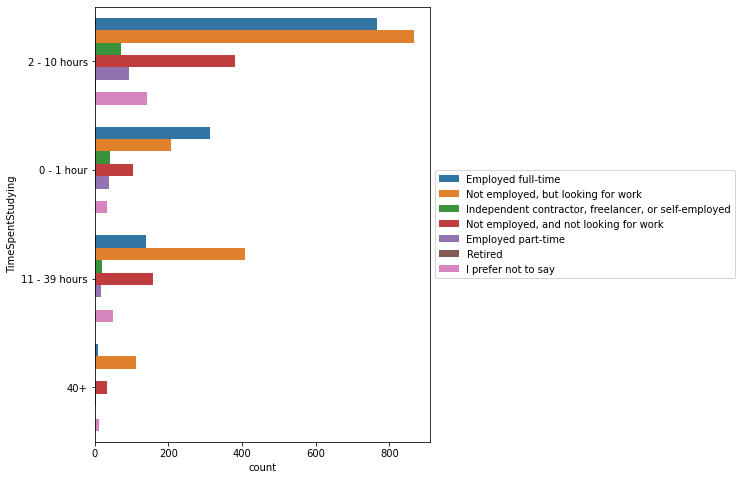

In [123]:
# hue 변수는 새로운 변수를 다른 색상을 이용하여 추가하는 파라미터

plt.figure(figsize = (6,8))
sns.countplot(y= 'TimeSpentStudying',
              data = mcq,
              hue = 'EmploymentStatus'
              ).legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

풀타임으로 일하는 사람들은 2~10시간 일하는 비율이 높이며, 풀타임으로 일하는 사람보다 일을 찾고 있는 사람들이 더 많은 시간을 공부하는 편이다.

하지만 응답자 중 대부분이 풀타임으로 일하고 있는 사람들이라는 것을 고려할 필요가 있다.

In [132]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work'
)]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


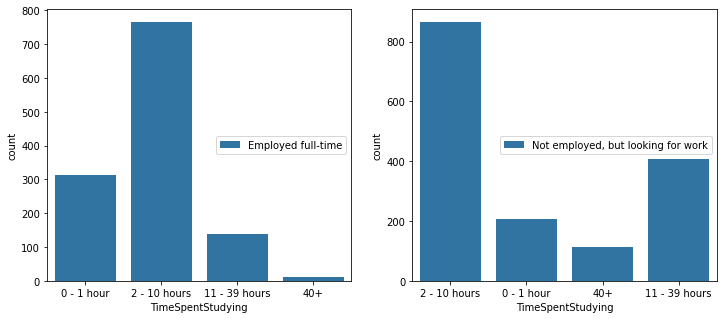

In [139]:
figure, (ax1, ax2) = plt.subplots(ncols = 2)

figure.set_size_inches(12,5)
sns.countplot(x = 'TimeSpentStudying',
              data = full_time,
              hue = 'EmploymentStatus', ax = ax1
              ).legend(loc = 'center right', bbox_to_anchor = (1, 0.5))



sns.countplot(x = 'TimeSpentStudying',
              data = looking_for_job,
              hue = 'EmploymentStatus', ax = ax2
              ).legend(loc = 'center right', bbox_to_anchor = (1, 0.5))